In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-interp-vander)

We create two vectors for data about the population of China. The first has the years of census data and the other has the population, in millions of people.

In [2]:
year = arange(1980, 2020, 10)   # from 1980 to 2020 by 10
pop = array([984.736, 1148.364, 1263.638, 1330.141])

It's convenient to measure time in years since 1980.

In [3]:
t = year - 1980
y = pop

Now we have four data points $(t_1,y_1),\dots,(t_4,y_4)$, so $n=4$ and we seek an interpolating cubic polynomial. We construct the associated Vandermonde matrix:

In [4]:
V = vander(t)
print(V)

[[    0     0     0     1]
 [ 1000   100    10     1]
 [ 8000   400    20     1]
 [27000   900    30     1]]


To solve a linear system $\mathbf{V} \mathbf{c} = \mathbf{y}$ for the vector of polynomial coefficients, we use `solve` (imported from `numpy.linalg`):

In [5]:
c = linalg.solve(V, y)
print(c)

[-6.95000e-05 -2.39685e-01  1.87666e+01  9.84736e+02]


The algorithms used by `solve` are the main topic of this chapter. As a check on the solution, we can compute the *residual* $\mathbf{y} - \mathbf{V} \mathbf{c}$, which should be small (near machine precision).

```{tip}
:class: dropdown
Matrix multiplication in NumPy is done with `@` or `matmul`.
```

In [6]:
print(y - V @ c)

[0. 0. 0. 0.]


By our definitions, the coefficients in `c` are given in descending order of power in $t$. We can use the resulting polynomial to estimate the population of China in 2005:

In [7]:
p = poly1d(c)          # construct a polynomial
print(p(2005 - 1980))     # apply the 1980 time shift

1303.0119375


The official figure was 1303.72, so our result is rather good.

We can visualize the interpolation process. First, we plot the data as points. Then we add a plot of the interpolant, taking care to shift the $t$ variable back to actual years.

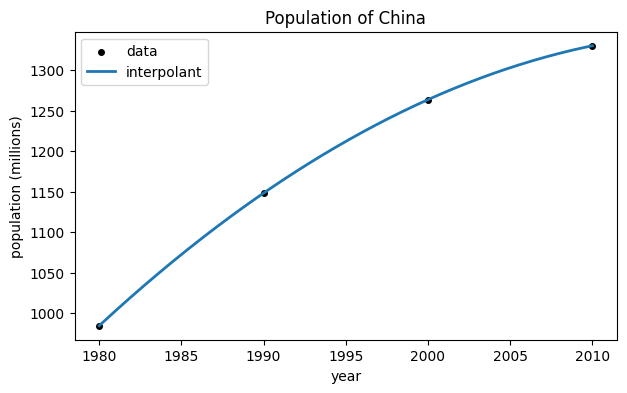

In [8]:
scatter(year, y, color="k", label="data");
tt = linspace(0, 30, 300)   # 300 times from 1980 to 2010
plot(1980 + tt, p(tt), label="interpolant");
xlabel("year");
ylabel("population (millions)");
title("Population of China");
legend();